<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/apple_tomatoVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.applications import VGG16

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_path = "/content/drive/MyDrive/apple-tomato/train"

In [ ]:
val_path = "/content/drive/MyDrive/apple-tomato/test"

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = data_gen.flow_from_directory(
  train_path,
  target_size=(224, 224),
  batch_size=32,
  class_mode='binary',
  shuffle=True)

Found 294 images belonging to 2 classes.


In [ ]:
val_generator = data_gen.flow_from_directory(
  val_path,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary',
  shuffle=False)

Found 97 images belonging to 2 classes.


In [ ]:
input_shape, num_classes = (224, 224, 3), 1

In [ ]:
input = Input(shape=input_shape)

base_model = VGG16(include_top=False, pooling="avg", weights="imagenet")(input)
dense_layer = Dense(64, activation='relu')(base_model)
output_layer = Dense(num_classes, activation='sigmoid')(dense_layer)

model = Model(inputs=input, outputs=output_layer)
model.layers[0].trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14747585 (56.26 MB)
Trainable params: 14747585 (56.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
fit_history = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=val_generator,
)

<ipython-input-15-6a2829a8601d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/100
10/10 [==============================] - 121s 10s/step - loss: 0.6601 - accuracy: 0.5748 - precision: 0.5175 - recall: 0.5692 - val_loss: 0.5580 - val_accuracy: 0.7629 - val_precision: 0.7273 - val_recall: 0.7442
Epoch 2/100
10/10 [==============================] - 4s 426ms/step - loss: 0.5716 - accuracy: 0.7313 - precision: 0.7217 - recall: 0.6385 - val_loss: 0.5278 - val_accuracy: 0.7938 - val_precision: 0.7949 - val_recall: 0.7209
Epoch 3/100
10/10 [==============================] - 4s 435ms/step - loss: 0.5634 - accuracy: 0.6871 - precision: 0.6301 - recall: 0.7077 - val_loss: 0.5272 - val_accuracy: 0.7938 - val_precision: 0.9259 - val_recall: 0.5814
Epoch 4/100
10/10 [==============================] - 4s 436ms/step - loss: 0.4856 - accuracy: 0.8027 - precision: 0.7812 - recall: 0.7692 - val_loss: 0.4967 - val_accuracy: 0.7732 - val_precision: 0.8889 - val_recall: 0.5581
Epoch 5/100
10/10 [==============================] - 4s 439ms/step - loss: 0.4735 - accuracy: 0.7857

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


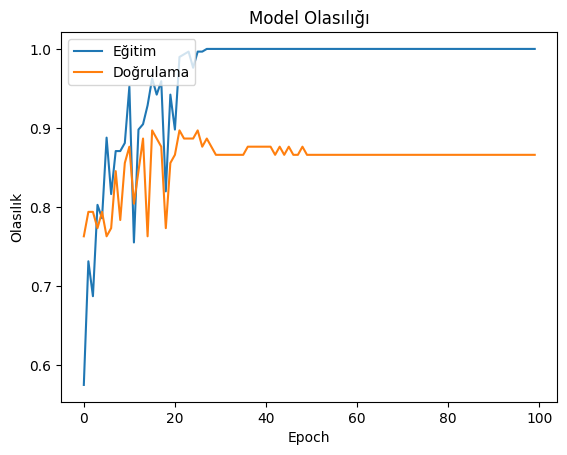

In [ ]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Olasılığı')
plt.ylabel('Olasılık')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

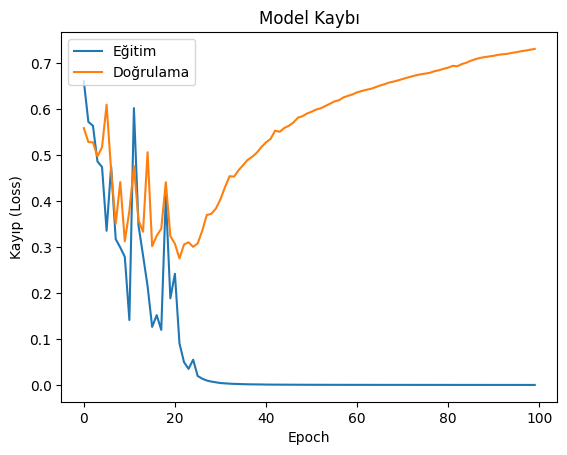

In [ ]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, precision, recall = model.evaluate(val_generator)

7/7 [==============================] - 0s 59ms/step - loss: 0.7301 - accuracy: 0.8660 - precision: 0.8571 - recall: 0.8372


In [ ]:
F1_Skoru = ((precision * recall) / (precision + recall)) * 2
F1_Skoru

0.847058818464048

In [ ]:
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred = np.round(y_pred)
confusion_matrisi = confusion_matrix(y_true, y_pred)
print(confusion_matrisi)

7/7 [==============================] - 1s 62ms/step
[[48  6]
 [ 7 36]]
